# MNIST Handwritten Digit Classification

In [1]:
# Import tensorflow and check if GPUs are available
import tensorflow as tf
import numpy as np

#### Load MNIST

In [2]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

# Load the data set
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
# Summarize loaded dataset
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_train.shape, y_train.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(60000, 28, 28), y=(60000,)


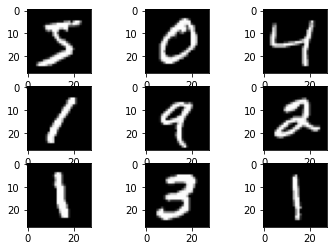

In [4]:
# Plot first few images
for i in range(9):
    # Define subplot
    plt.subplot(330 + 1 + i)
    # Plot raw pixel data
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
# Show the figure
plt.show()

In [5]:
# One Hot Encode Target Values
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [6]:
# load train and test dataset
def load_dataset():
    # load dataset
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    # reshape dataset to have a single channel
    X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
    X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
    # one hot encode target values
    y_train = tf.keras.utils.to_categorical(y_train)
    y_test = tf.keras.utils.to_categorical(y_test)
    return X_train, y_train, X_test, y_test

#### Preprocessing

In [7]:
# Preprocess inputs
def prep_pixels(train, test):
    # Comvert from integers to floats
    train_norm = train.astype("float32")
    test_norm = test.astype("float32")
    # Normalize
    train_norm /= 255.0
    test_norm /= 255.0
    # Return normalized images
    return train_norm, test_norm

#### Define Model

In [8]:
# Define the model
def define_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(100, activation="relu", kernel_initializer="he_uniform"),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(10, activation="softmax")
    ])
    opt = tf.keras.optimizers.SGD(lr=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])
    return model

#### Evaluate the model

In [9]:
# Evaluate a model using k-fold cross-validation
def evaluate_model(dataX, dataY, n_folds=5):
    scores, histories = list(), list()
    # Prepare Cross Validation
    kfold = KFold(n_folds, shuffle=True, random_state=1)
    # Enumerate splis
    for train_ix, test_ix in kfold.split(dataX):
        # Define model
        model = define_model()
        # select rows for train and test
        trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
        # fit model
        history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
        # evaluate model
        _, acc = model.evaluate(testX, testY, verbose=0)
        print('> %.3f' % (acc * 100.0))
        # stores scores
        scores.append(acc)
        histories.append(history)
    return scores, histories

#### Presenting Results

In [10]:
def summarize_diagnostics(histories):
    for i in range(len(histories)):
        # plot loss
        plt.subplot(2, 1, 1)
        plt.title('Cross Entropy Loss')
        plt.plot(histories[i].history['loss'], color='blue', label='train')
        plt.plot(histories[i].history['val_loss'], color='orange', label='test')
        # plot accuracy
        plt.subplot(2, 1, 2)
        plt.title('Classification Accuracy')
        plt.plot(histories[i].history['accuracy'], color='blue', label='train')
        plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
    plt.show()

In [11]:
# summarize model performance
def summarize_performance(scores):
    # print summary
    print('Accuracy: mean=%.3f std=%.3f, n=%d' % (np.mean(scores)*100, np.std(scores)*100, len(scores)))
    # box and whisker plots of results
    plt.boxplot(scores)
    plt.show()

#### Drive the test harness

In [12]:
def run_test_harness():
    # Load dataset
    X_train, y_train, X_test, y_test = load_dataset()
    # Preprocess
    X_train, X_test = prep_pixels(X_train, X_test)
    # Evaluate the model
    scores, histories = evaluate_model(X_train, y_train)
    # Learning curves
    summarize_diagnostics(histories)
    # Summarize estimated performace
    summarize_performance(scores)
    # Create a new model to train and save
    model = define_model()
    model.fit(X_test, y_test, epochs=10, batch_size=32, verbose=1)
    model.save("final_model.h5")
    	# evaluate model on test dataset
    _, acc = model.evaluate(X_test, y_test, verbose=0)
    print('> %.3f' % (acc * 100.0))

> 99.217
> 99.142
> 99.067
> 99.375
> 99.075


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


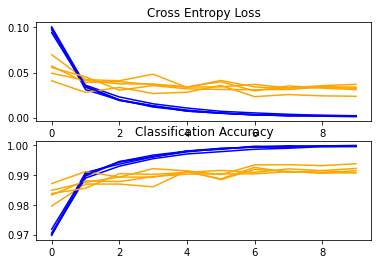

Accuracy: mean=99.175 std=0.114, n=5


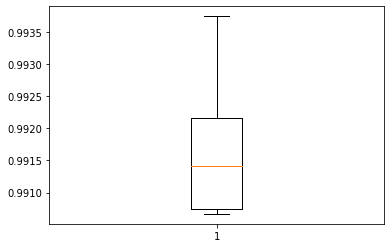

Epoch 1/10
313/313 [==============================] - 2s 3ms/step - loss: 0.4109 - accuracy: 0.8769
Epoch 2/10
313/313 [==============================] - 1s 3ms/step - loss: 0.0418 - accuracy: 0.9887
Epoch 3/10
313/313 [==============================] - 1s 3ms/step - loss: 0.0172 - accuracy: 0.9960
Epoch 4/10
313/313 [==============================] - 1s 3ms/step - loss: 0.0103 - accuracy: 0.9988
Epoch 5/10
313/313 [==============================] - 1s 4ms/step - loss: 0.0072 - accuracy: 0.9986
Epoch 6/10
313/313 [==============================] - 1s 4ms/step - loss: 0.0036 - accuracy: 0.9998
Epoch 7/10
313/313 [==============================] - 1s 4ms/step - loss: 0.0027 - accuracy: 0.9999
Epoch 8/10
313/313 [==============================] - 1s 4ms/step - loss: 0.0027 - accuracy: 0.9998
Epoch 9/10
313/313 [==============================] - 1s 4ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 10/10
313/313 [==============================] - 1s 4ms/step - loss: 0.0014 - accuracy: 1.0000

In [13]:
run_test_harness()